In [3]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with open('chkpt/test_samples_32_4.pickle','rb') as in_file:
    samples = pickle.load(in_file)

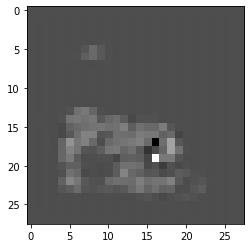

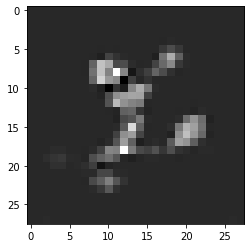

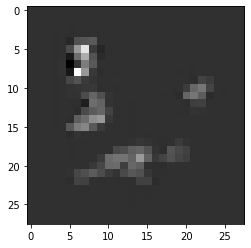

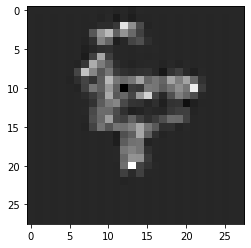

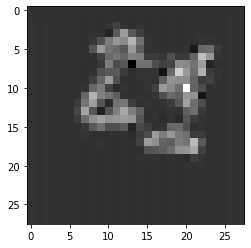

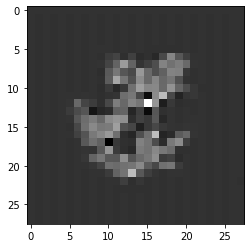

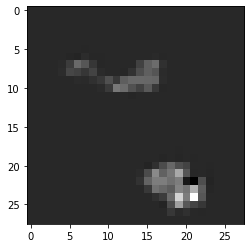

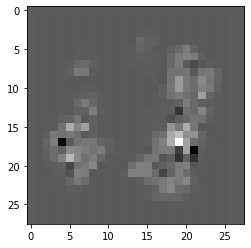

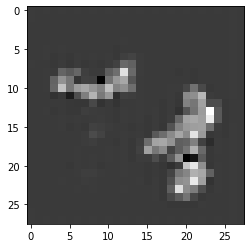

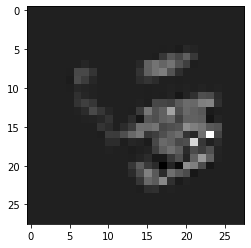

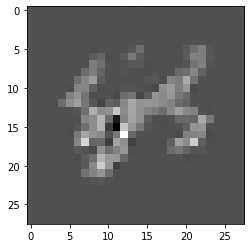

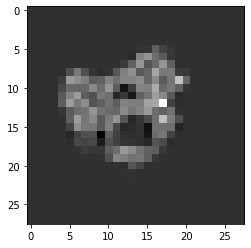

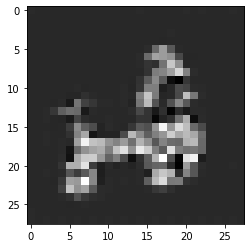

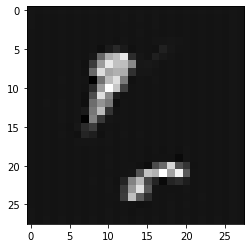

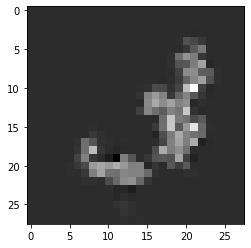

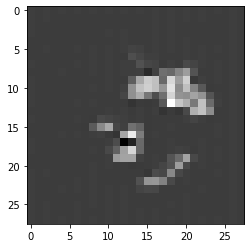

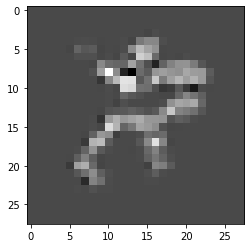

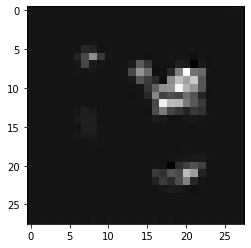

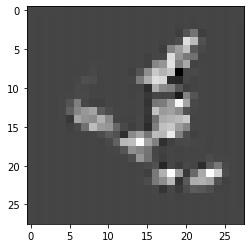

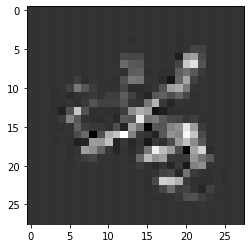

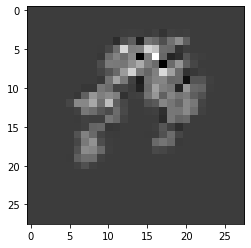

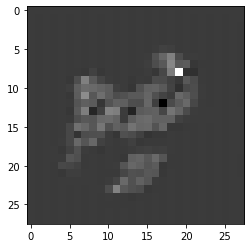

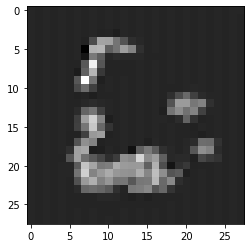

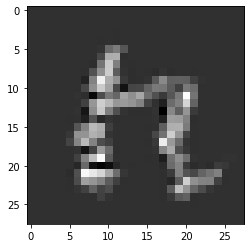

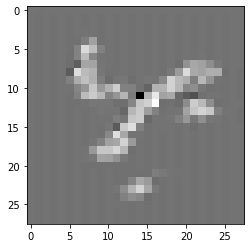

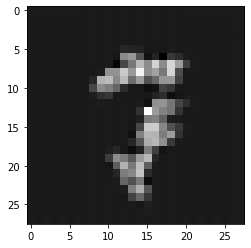

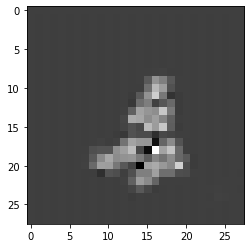

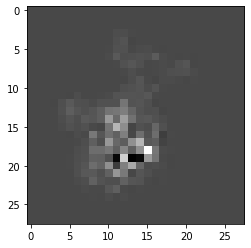

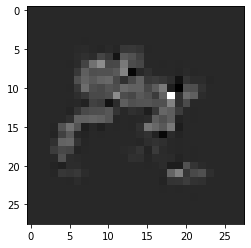

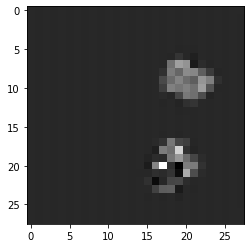

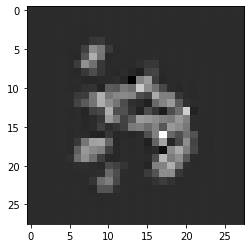

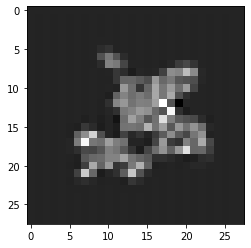

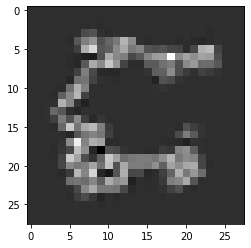

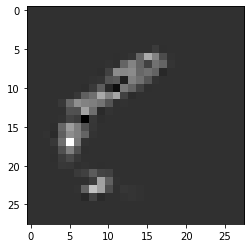

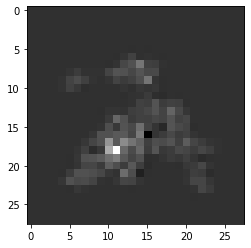

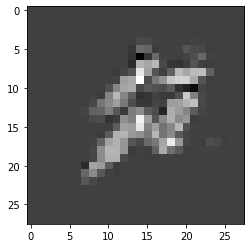

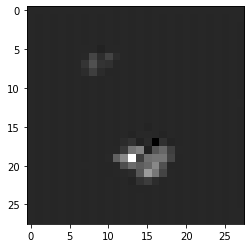

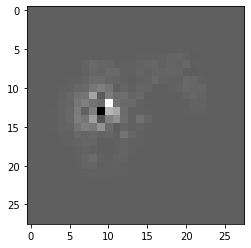

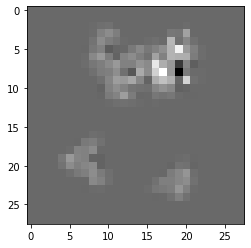

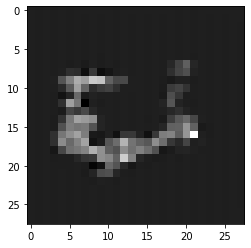

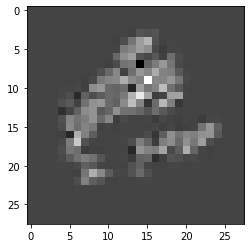

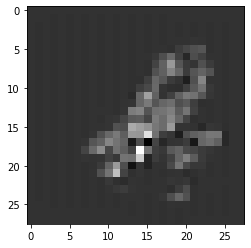

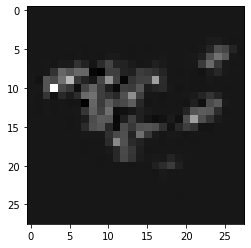

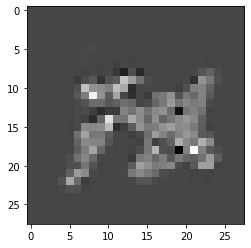

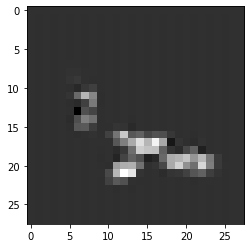

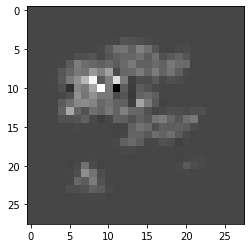

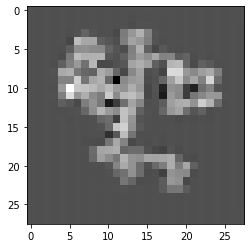

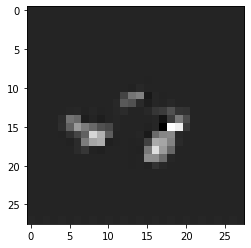

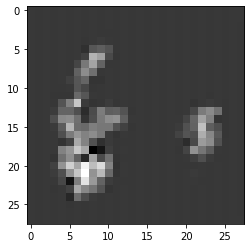

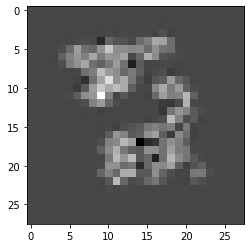

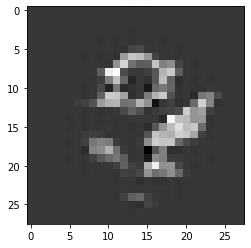

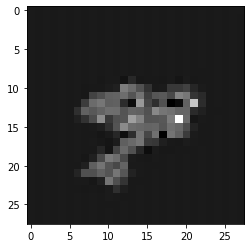

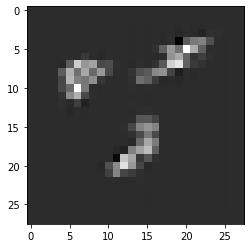

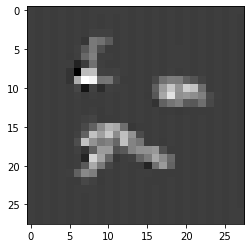

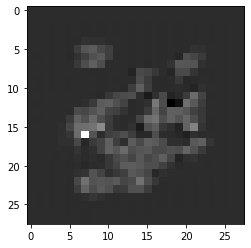

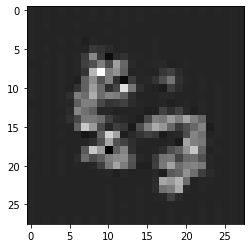

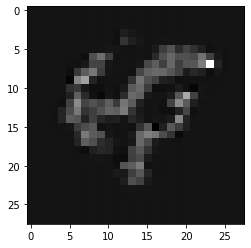

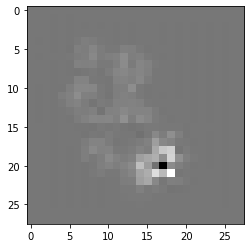

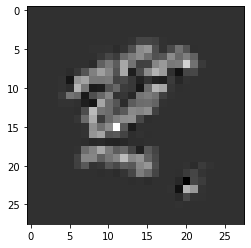

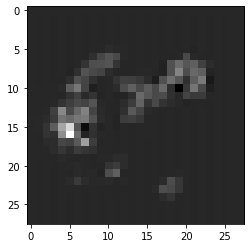

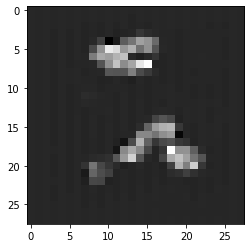

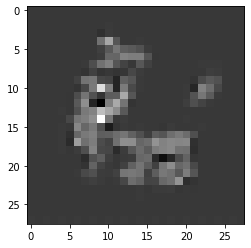

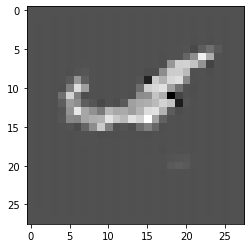

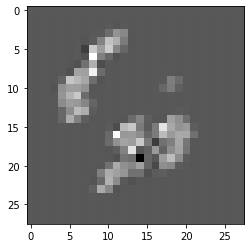

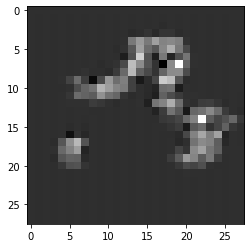

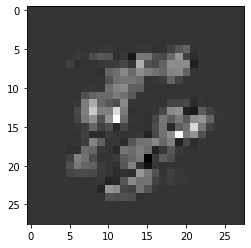

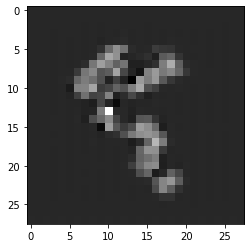

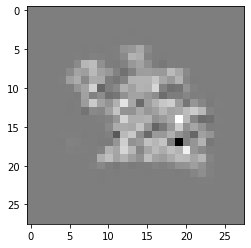

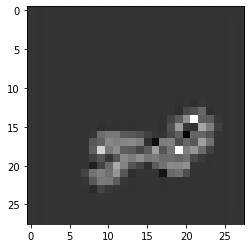

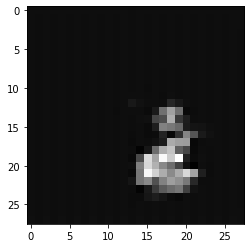

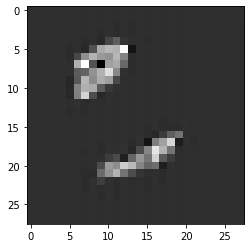

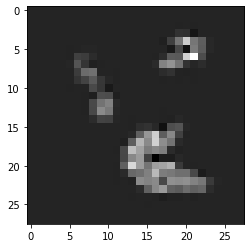

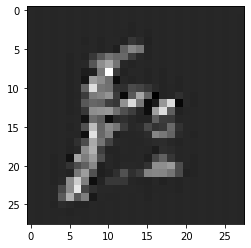

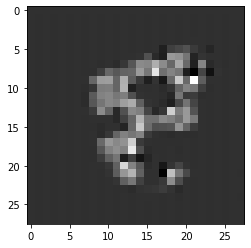

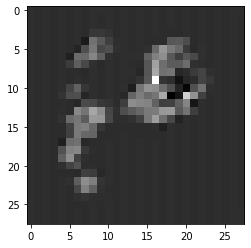

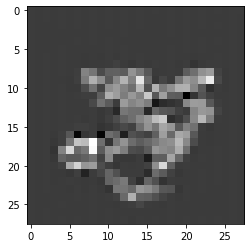

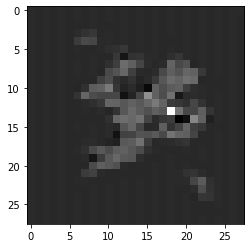

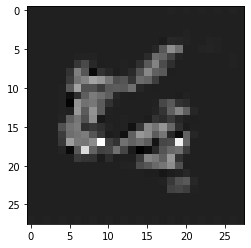

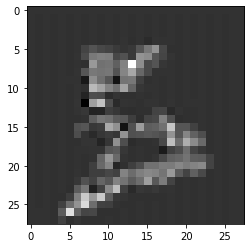

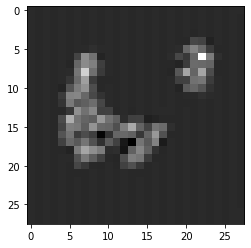

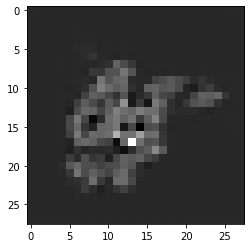

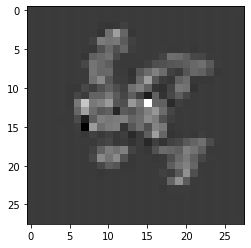

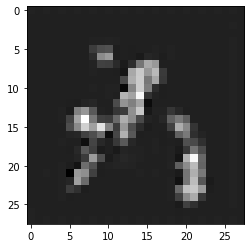

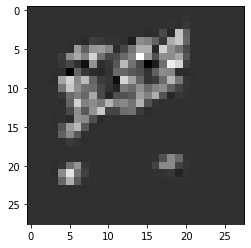

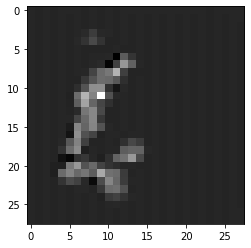

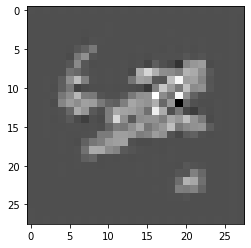

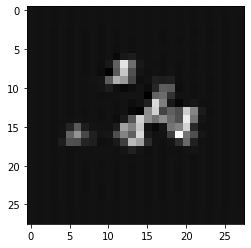

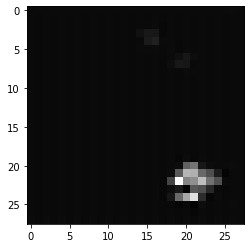

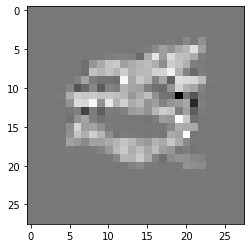

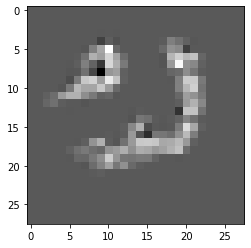

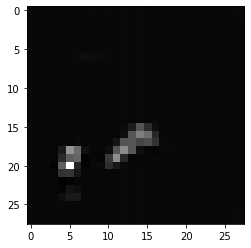

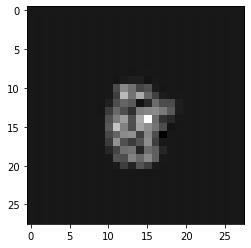

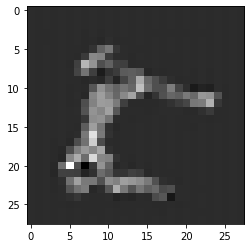

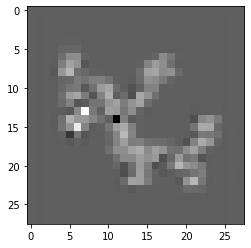

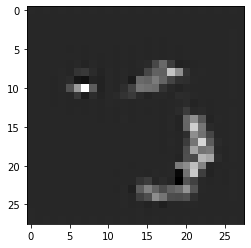

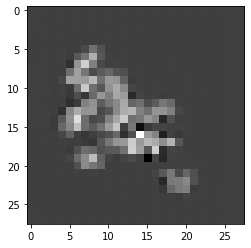

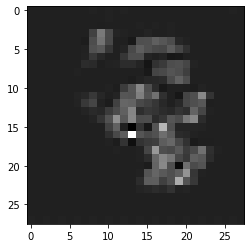

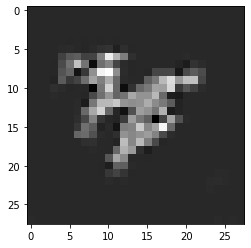

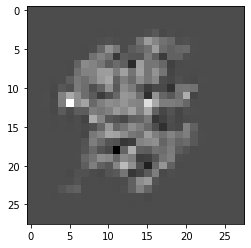

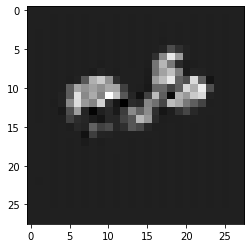

In [5]:
for sample in samples:
    plt.imshow(sample[0], cmap='gray')
    plt.show()
